In [1]:
import numpy as np
from sklearn import datasets

import DReaM





# Iris Dataset
This is an exmple where rule-generating features and cluster-preserving features are identical, and no prior rules are provided.

repeat 0 / 10
iter 0 / 100, log-likelihood:340.4068348724879
iter 1 / 100, log-likelihood:340.45736505994415
iter 2 / 100, log-likelihood:340.47041082173985
iter 3 / 100, log-likelihood:340.47588594453947
iter 4 / 100, log-likelihood:340.4792719152736
Converged!
repeat 1 / 10
iter 0 / 100, log-likelihood:340.4068348724879
iter 1 / 100, log-likelihood:340.45736505994415
iter 2 / 100, log-likelihood:340.47041082173985
iter 3 / 100, log-likelihood:340.47588594453947
iter 4 / 100, log-likelihood:340.47927191527367
Converged!
repeat 2 / 10
iter 0 / 100, log-likelihood:340.4068348724879
iter 1 / 100, log-likelihood:340.45736505994415
iter 2 / 100, log-likelihood:340.47041082173985
iter 3 / 100, log-likelihood:340.47588594453947
iter 4 / 100, log-likelihood:340.47927191527367
Converged!
repeat 3 / 10
iter 0 / 100, log-likelihood:340.4068348724879
iter 1 / 100, log-likelihood:340.45736505994415
iter 2 / 100, log-likelihood:340.47041082173985
iter 3 / 100, log-likelihood:340.47588594453947
iter

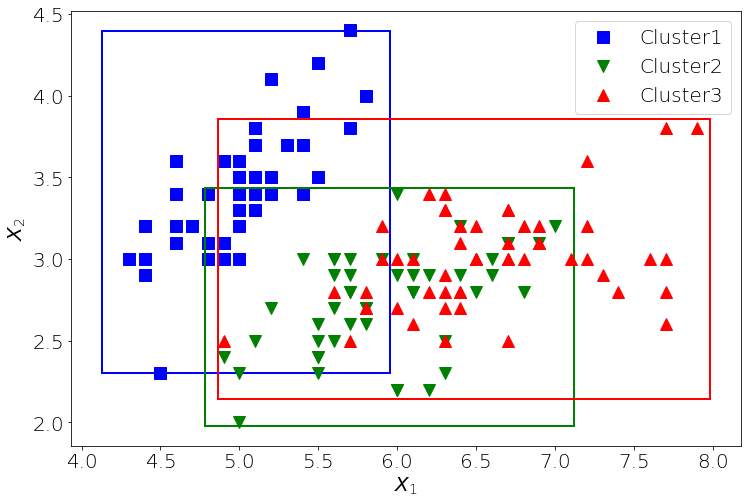

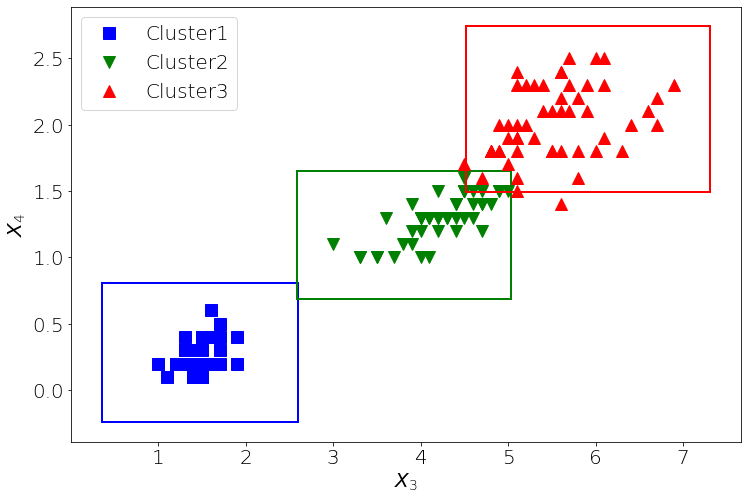

In [2]:
data = datasets.load_iris()["data"] # Load the iris dataset

# Assuming rule-generating features and cluster-preserving features are 
# identical. I.e., X = Y.
M = DReaM.DReaM(data, data, K = 3) 

# We repeat the algorithm for 10 times. In each time we randomly 
# initialize the model using GMM. We keep the results with the maximum 
# likelihood.
M.repeat() 

# Plot the rules.
M.plot_rules(0,1)
M.plot_rules(2,3)


# Display the rules discovered.
print()
print(M.get_rules())

# Synthetic Data

This is an exmple where rule-generating features and cluster-preserving features are different, and prior rules are provided. We first generate the data and then run the algorithm on the data.

repeat 0 / 10
iter 0 / 100, log-likelihood:-899.2375933354164
iter 1 / 100, log-likelihood:-870.3196364382699
iter 2 / 100, log-likelihood:-839.1747588499458
iter 3 / 100, log-likelihood:-808.3605922957397
iter 4 / 100, log-likelihood:-777.3091944281429
iter 5 / 100, log-likelihood:-742.9474454124231
iter 6 / 100, log-likelihood:-703.3063869878949
iter 7 / 100, log-likelihood:-655.8267286364245
iter 8 / 100, log-likelihood:-590.8055550204481
iter 9 / 100, log-likelihood:-489.3243796386233
iter 10 / 100, log-likelihood:-303.85767062102667
iter 11 / 100, log-likelihood:-76.65455745134402
iter 12 / 100, log-likelihood:-57.21954154935311
iter 13 / 100, log-likelihood:-57.21645573589333
iter 14 / 100, log-likelihood:-57.216451934419155
Converged!
repeat 1 / 10
iter 0 / 100, log-likelihood:-903.4790328677664
iter 1 / 100, log-likelihood:-875.874740069292
iter 2 / 100, log-likelihood:-844.8535226244207
iter 3 / 100, log-likelihood:-813.9354332776504
iter 4 / 100, log-likelihood:-783.166777285

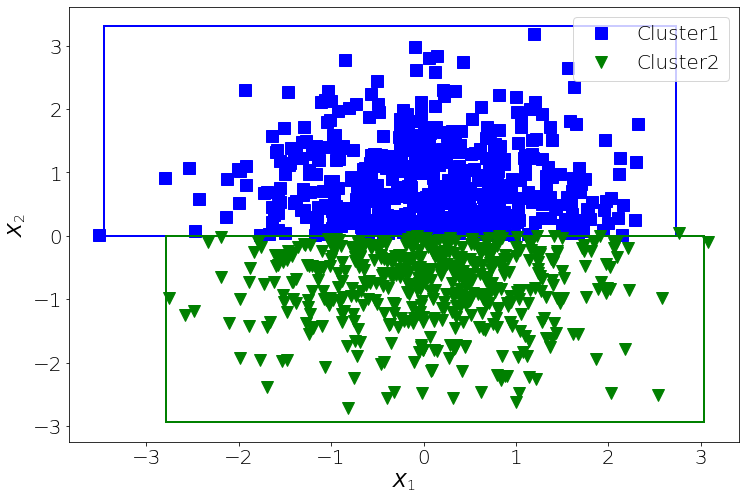

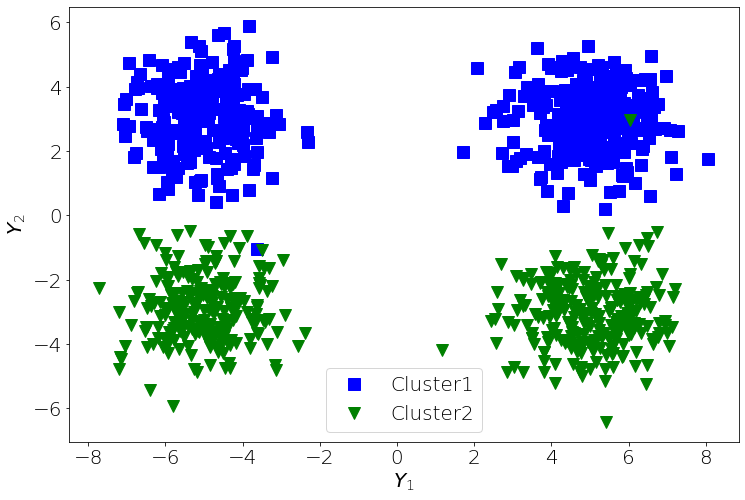

In [3]:
    # Generating the data
    N = 1000
    D = 2
    X = np.random.normal(0, 1, [N, D])
    
    Y = np.zeros([N, D])
    
    ind_1 = np.bitwise_and(X[:, 0]>0, X[:, 1]>0)
    Y[ind_1, 0] = np.random.normal(5, 1, ind_1.sum())
    Y[ind_1, 1] = np.random.normal(3, 1, ind_1.sum())

    ind_2 = np.bitwise_and(X[:, 0]>0, X[:, 1]<0)
    Y[ind_2, 0] = np.random.normal(5, 1, ind_2.sum())
    Y[ind_2, 1] = np.random.normal(-3, 1, ind_2.sum())

    ind_3 = np.bitwise_and(X[:, 0]<0, X[:, 1]>0)
    Y[ind_3, 0] = np.random.normal(-5, 1, ind_3.sum())
    Y[ind_3, 1] = np.random.normal(3, 1, ind_3.sum())

    ind_4 = np.bitwise_and(X[:, 0]<0, X[:, 1]<0)
    Y[ind_4, 0] = np.random.normal(-5, 1, ind_4.sum())
    Y[ind_4, 1] = np.random.normal(-3, 1, ind_4.sum())
    
    
    # Defining prior rules.
    mu_t_plus0 = np.array([[3, 3], [3, -1]])
    mu_t_minus0 = np.array([[-3, -1], [-3, -3]])
    
    M = DReaM.DReaM(X, Y, K = 2, mu_t_plus0 = mu_t_plus0, mu_t_minus0 = mu_t_minus0)
    
    # We repeat the algorithm for 10 times. In each time we randomly 
    # initialize the model based on the prior rules. We keep the results with 
    # the maximum likelihood.
    M.repeat()
    
    # Plot the rules.
    M.plot_rules()
    # Plot the cluster-preserving features Y.
    M.plot_Y()


    # Display the rules discovered.
    print()
    print(M.get_rules())
    
